## Neural Network Modelling for NER using Embedding from Language Models (ELMo)
### Note 1: You need an active internet connection to download ELMo and cache it when running for the first time.
### Note 2: ELMo training and testing takes way too long to execute and needs a computer with atleast 32 GB RAM

#### Input Files:
#### Corpus_Sentences, Corpus_Sentences_Tags Corpus_POS_Tags
#### Output Files:
#### Corpus_Sentences_Test, Corpus_Sentences_Tags_Test, Corpus_POS_Tags_Test

In [48]:
import numpy as np
import pandas as pd
import csv

In [2]:
# Reading required Files
list_of_sent_tags = list()
list_of_sent_POS_tags = list()
list_of_sent_words = list()
with open("C:\\Project_NLP_Final\\Project Dataset\\PreProcessing\\Regex\\Corpus_Sentences.csv","r", encoding="utf8") as csv_file:
    csv_file = csv.reader(csv_file, delimiter=',', quotechar = '"')
    for row in csv_file:
        list_of_sent_words.append(row)

with open("C:\\Project_NLP_Final\\Project Dataset\\PreProcessing\\Regex\\Corpus_Sentences_Tags.csv","r", encoding="utf8") as csv_file:
    csv_file = csv.reader(csv_file, delimiter=',', quotechar = '"')
    for row in csv_file:
        list_of_sent_tags.append(row)
    
with open("C:\\Project_NLP_Final\\Project Dataset\\PreProcessing\\Regex\\Corpus_POS_Tags.csv","r", encoding="utf8") as csv_file:
    csv_file = csv.reader(csv_file, delimiter=',', quotechar = '"')
    for row in csv_file:
        list_of_sent_POS_tags.append(row)

In [3]:
list_of_sent_tags_test = list()
list_of_sent_POS_tags_test = list()
list_of_sent_words_test = list()
with open("C:\\Project_NLP_Final\\Project Dataset\\PreProcessing\\Regex\\Corpus_Sentences_Test.csv","r", encoding="utf8") as csv_file:
    csv_file = csv.reader(csv_file, delimiter=',', quotechar = '"')
    for row in csv_file:
        list_of_sent_words_test.append(row)

with open("C:\\Project_NLP_Final\\Project Dataset\\PreProcessing\\Regex\\Corpus_Sentences_Tags_Test.csv","r", encoding="utf8") as csv_file:
    csv_file = csv.reader(csv_file, delimiter=',', quotechar = '"')
    for row in csv_file:
        list_of_sent_tags_test.append(row)
    
with open("C:\\Project_NLP_Final\\Project Dataset\\PreProcessing\\Regex\\Corpus_POS_Tags_Test.csv","r", encoding="utf8") as csv_file:
    csv_file = csv.reader(csv_file, delimiter=',', quotechar = '"')
    for row in csv_file:
        list_of_sent_POS_tags_test.append(row)

In [4]:
new_sent_tags = list_of_sent_tags + list_of_sent_tags_test

In [5]:
new_sent_words = list_of_sent_words + list_of_sent_words_test

In [6]:
new_sent_POS_tags = list_of_sent_POS_tags + list_of_sent_POS_tags_test

In [7]:
req_list_test = [["Sentence: " + str(i + 1), word, POS, tag] for i, (sent, POS_sent, tag_sent) in enumerate(zip(list_of_sent_words_test, list_of_sent_POS_tags_test, list_of_sent_tags_test)) for word, POS, tag in zip(sent, POS_sent, tag_sent)]
data_test = pd.DataFrame(req_list_test, columns = ["Sentence #", "Word", "POS", "Tag"])
data_test.tail(20)

,Sentence #,Word,POS,Tag
130172,Sentence: 8785,if,IN,O
130173,Sentence: 8785,the,DT,O
130174,Sentence: 8785,pain,NN,B-SSLIF
130175,Sentence: 8785,worsens,NNS,O
130176,Sentence: 8785,in,IN,O
130177,Sentence: 8785,the,DT,O
130178,Sentence: 8785,interim,NN,O
130179,Sentence: 8785,.,.,O
130180,Sentence: 8786,Electronically,RB,O
130181,Sentence: 8786,signed,VBN,O


In [8]:
req_list_train = [["Sentence: " + str(i + 1), word, POS, tag] for i, (sent, POS_sent, tag_sent) in enumerate(zip(list_of_sent_words, list_of_sent_POS_tags, list_of_sent_tags)) for word, POS, tag in zip(sent, POS_sent, tag_sent)]
data_train = pd.DataFrame(req_list_train, columns = ["Sentence #", "Word", "POS", "Tag"])
data_train.tail(20)

,Sentence #,Word,POS,Tag
730925,Sentence: 52217,Signed,NNP,O
730926,Sentence: 52217,By,IN,O
730927,Sentence: 52217,Name,NNP,O
730928,Sentence: 52217,Name,NNP,O
730929,Sentence: 52217,Name,NNP,O
730930,Sentence: 52217,",",",",O
730931,Sentence: 52217,MD,NNP,O
730932,Sentence: 52217,Date,NNP,O
730933,Sentence: 52217,14,CD,O
730934,Sentence: 52217,38,CD,O


In [9]:
req_list = [["Sentence: " + str(i + 1), word, POS, tag] for i, (sent, POS_sent, tag_sent) in enumerate(zip(new_sent_words, new_sent_POS_tags, new_sent_tags)) for word, POS, tag in zip(sent, POS_sent, tag_sent)]
data = pd.DataFrame(req_list, columns = ["Sentence #", "Word", "POS", "Tag"])
data.tail(20)

,Sentence #,Word,POS,Tag
861117,Sentence: 61002,if,IN,O
861118,Sentence: 61002,the,DT,O
861119,Sentence: 61002,pain,NN,B-SSLIF
861120,Sentence: 61002,worsens,NNS,O
861121,Sentence: 61002,in,IN,O
861122,Sentence: 61002,the,DT,O
861123,Sentence: 61002,interim,NN,O
861124,Sentence: 61002,.,.,O
861125,Sentence: 61003,Electronically,RB,O
861126,Sentence: 61003,signed,VBN,O


In [10]:
words = list(set(data["Word"].values))
words = sorted(words)
words.append("ENDPAD")
n_words = len(words); n_words

18906

In [11]:
words_tr = list(set(data_train["Word"].values))
words_tr = sorted(words_tr)
words_tr.append("ENDPAD")
n_words_tr = len(words_tr); n_words_tr

17404

In [12]:
words_te = list(set(data_test["Word"].values))
words_te = sorted(words_te)
words_te.append("ENDPAD")
n_words_te = len(words_te); n_words_te

8334

In [13]:
tags_test = list(set(data_test["Tag"].values))
tags_test = sorted(tags_test)
n_tags_test = len(tags_test); n_tags_test

21

In [14]:
tags = list(set(data["Tag"].values))
tags = sorted(tags)
n_tags = len(tags); n_tags

21

In [15]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [16]:
getter = SentenceGetter(data_train)

In [17]:
getter_test = SentenceGetter(data_test)

In [18]:
sent = getter.get_next()

In [20]:
sentences = getter.sentences

In [21]:
sentences_test = getter_test.sentences

In [22]:
max_len = 50
tag2idx = {t: i for i, t in enumerate(tags)}

In [23]:
tag2idx["B-Drug"]

2

In [24]:
# Getting the training and testing data
from keras.preprocessing.sequence import pad_sequences
X_te = [[w[0] for w in s] for s in sentences_test]
X_tr = [[w[0] for w in s] for s in sentences]

Using TensorFlow backend.


In [25]:
new_X = []
for seq in X_te:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("__PAD__")
    new_X.append(new_seq)
X_te = new_X

new_X = []
for seq in X_tr:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("__PAD__")
    new_X.append(new_seq)
X_tr = new_X

In [27]:
y_te = [[tag2idx[w[2]] for w in s] for s in sentences_test]
y_tr = [[tag2idx[w[2]] for w in s] for s in sentences]

In [28]:
y_te = pad_sequences(maxlen=max_len, sequences=y_te, padding="post", value=tag2idx["O"])
y_tr = pad_sequences(maxlen=max_len, sequences=y_tr, padding="post", value=tag2idx["O"])

In [29]:
batch_size = 32

In [33]:
import tensorflow as tf
import tensorflow_hub as hub
from keras import backend as K

In [34]:
sess = tf.Session()
K.set_session(sess)

In [35]:
# Getting the ELMo Model
elmo_model = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

INFO:tensorflow:Using C:\Users\ASHWIN~1\AppData\Local\Temp\tfhub_modules to cache modules.
INFO:tensorflow:Initialize variable module/aggregation/scaling:0 from checkpoint b'C:\\Users\\ASHWIN~1\\AppData\\Local\\Temp\\tfhub_modules\\9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d\\variables\\variables' with aggregation/scaling
INFO:tensorflow:Initialize variable module/aggregation/weights:0 from checkpoint b'C:\\Users\\ASHWIN~1\\AppData\\Local\\Temp\\tfhub_modules\\9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d\\variables\\variables' with aggregation/weights
INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_0:0 from checkpoint b'C:\\Users\\ASHWIN~1\\AppData\\Local\\Temp\\tfhub_modules\\9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d\\variables\\variables' with bilm/CNN/W_cnn_0
INFO:tensorflow:Initialize variable module/bilm/CNN/W_cnn_1:0 from checkpoint b'C:\\Users\\ASHWIN~1\\AppData\\Local\\Temp\\tfhub_modules\\9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d\\variables\\variables' with bilm/CNN/W_cnn_1
I

INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel:0 from checkpoint b'C:\\Users\\ASHWIN~1\\AppData\\Local\\Temp\\tfhub_modules\\9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d\\variables\\variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/kernel
INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel:0 from checkpoint b'C:\\Users\\ASHWIN~1\\AppData\\Local\\Temp\\tfhub_modules\\9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d\\variables\\variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell0/rnn/lstm_cell/projection/kernel
INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias:0 from checkpoint b'C:\\Users\\ASHWIN~1\\AppData\\Local\\Temp\\tfhub_modules\\9bb74bc86f9caffc8c47dd7b33ec4bb354d9602d\\variables\\variables' with bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/lstm_cell/bias
INFO:tensorflow:Initialize variable module/bilm/RNN_1/RNN/MultiRNNCell/Cell1/rnn/l

In [36]:
def ElmoEmbedding(x):
    return elmo_model(inputs={
                            "tokens": tf.squeeze(tf.cast(x, tf.string)),
                            "sequence_len": tf.constant(batch_size*[max_len])
                      },
                      signature="tokens",
                      as_dict=True)["elmo"]

In [37]:
from keras.models import Model, Input
from keras.layers.merge import add
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda

In [38]:
# Neural Network Modelling
input_text = Input(shape=(max_len,), dtype=tf.string)
embedding = Lambda(ElmoEmbedding, output_shape=(max_len, 1024))(input_text)
x = Bidirectional(LSTM(units=512, return_sequences=True,
                       recurrent_dropout=0.2, dropout=0.2))(embedding)
x_rnn = Bidirectional(LSTM(units=512, return_sequences=True,
                           recurrent_dropout=0.2, dropout=0.2))(x)
x = add([x, x_rnn])  # residual connection to the first biLSTM
out = TimeDistributed(Dense(n_tags, activation="softmax"))(x)

In [39]:
model = Model(input_text, out)

In [40]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [41]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 50, 1024)     0           input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 50, 1024)     6295552     lambda_1[0][0]                   
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 50, 1024)     6295552     bidirectional_1[0][0]            
__________________________________________________________________________________________________
add_1 (Add

In [42]:
# Make sure to match the train, validation and testing size of data to match with the last batch size of the epoch. 
# Otherwise ELMo makes the Keras Model to break down and crash.
X_tr, X_val = X_tr[:1305*batch_size], X_tr[-325*batch_size:]
y_tr, y_val = y_tr[:1305*batch_size], y_tr[-325*batch_size:]
y_tr = y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)
y_val = y_val.reshape(y_val.shape[0], y_val.shape[1], 1)

In [43]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger("C:\\Project_NLP_Final\\Project Dataset\\Saved Models\\ELMo\\training_log_ELMo.log", separator=',', append=False)
history = model.fit(np.array(X_tr), y_tr, validation_data=(np.array(X_val), y_val),
                    batch_size=batch_size, epochs=5, verbose=1, callbacks=[csv_logger])

Train on 41760 samples, validate on 10400 samples
Epoch 1/5
41760/41760 [==============================] - 56417s 1s/step - loss: 0.0695 - acc: 0.9795 - val_loss: 0.0562 - val_acc: 0.9826
Epoch 2/5
41760/41760 [==============================] - 59324s 1s/step - loss: 0.0432 - acc: 0.9862 - val_loss: 0.0560 - val_acc: 0.9832
Epoch 3/5
41760/41760 [==============================] - 55979s 1s/step - loss: 0.0365 - acc: 0.9880 - val_loss: 0.0538 - val_acc: 0.9842
Epoch 4/5
41760/41760 [==============================] - 55449s 1s/step - loss: 0.0312 - acc: 0.9895 - val_loss: 0.0537 - val_acc: 0.9846
Epoch 5/5
41760/41760 [==============================] - 52890s 1s/step - loss: 0.0273 - acc: 0.9906 - val_loss: 0.0575 - val_acc: 0.9848


In [37]:
import pandas as pd
# log_data = history.history 
log_data = pd.read_csv("C:\\Project_NLP_Final\\Project Dataset\\Saved Models\\ELMo\\training_log_ELMo.log", sep=',', engine='python') 

In [38]:
from keras_contrib.utils import save_load_utils
save_load_utils.save_all_weights(model,"C:\\Project_NLP_Final\\Project Dataset\\Saved Models\\ELMo\\NN_model_ELMo.h5")
#model.save("C:\\Project_NLP_Final\\Project Dataset\\Saved Models\\ELMo\\NN_model_ELMo.h5")  # creates a HDF5 file 'my_model.h5'

In [51]:
from keras_contrib.utils import save_load_utils
# returns a compiled model
# identical to the previous one
#del model

#save_load_utils.load_all_weights(model,"C:\\Project_NLP_Final\\Project Dataset\\Saved Models\\ELMo\\NN_model_ELMo.h5")
#model = load_model("C:\\Project_NLP_Final\\Project Dataset\\Saved Models\\ELMo\\NN_Model_ELMo.h5", custom_objects={'CRF':CRF})

OSError: Unable to open file (file signature not found)

In [39]:
hist = pd.DataFrame(log_data)

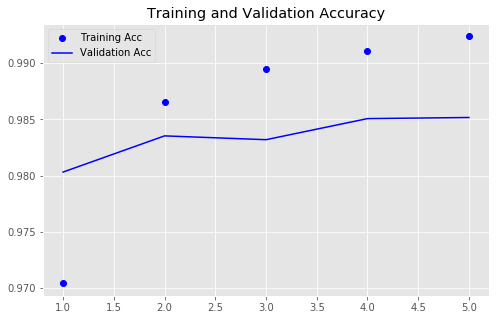

In [42]:
# Visualizing the Train-Validation Accuracy and Loss Curves
import matplotlib.pyplot as plt
acc = hist['acc']
val_acc = hist['val_acc']
epochs = range(1, len(acc) + 1)
plt.style.use("ggplot")
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

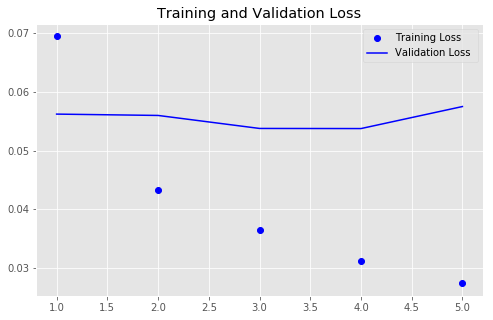

In [49]:
loss = hist['loss']
val_loss = hist['val_loss']
epochs = range(1, len(acc) + 1)
plt.style.use("ggplot")
plt.figure(figsize=(8,5))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss ')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [50]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [54]:
# Truncating the data so that the last batch size can fit the data
X_te = X_te[:8768]

In [55]:
# Predicting on the test data
test_pred = model.predict(np.array(X_te), verbose=1)

8768/8768 [==============================] - 7552s 861ms/step


In [56]:
# Truncating the test tags accordingly
y_te = y_te[:8768]

In [59]:
idx2tag = {i: w for w, i in tag2idx.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("__PAD__", "O"))
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_te)
indices = [i for i, v in enumerate(pred_labels) if test_labels[i] != pred_labels[i]]

In [ ]:
idx2tag = {i: w for w, i in tag2idx.items()}
def tolabel(predicted):
    out = []
    for i, pred_i in enumerate(predicted):
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p])
        out.append(out_i)
    return out
test_labels = tolabel(y_te)
#pred_labels = tolabel(test_pred)

In [70]:
indices = [i for i, v in enumerate(pred_labels) if test_labels[i] != pred_labels[i]]

In [64]:
from sklearn.metrics import precision_recall_fscore_support

In [65]:
f1_score(test_labels, pred_labels, average='weighted')

0.7375749568045533

In [66]:
f1_score(test_labels, pred_labels, average='micro')

0.7375749568045533

In [67]:
f1_score(test_labels, pred_labels, average='macro')

0.7375749568045533

In [68]:
print(classification_report(test_labels, pred_labels))

             precision    recall  f1-score   support

       Drug       0.87      0.75      0.81      2132
  Frequency       0.72      0.55      0.63       536
   Severity       0.77      0.75      0.76       464
 Indication       0.49      0.34      0.40       557
      SSLIF       0.74      0.80      0.77      5016
        ADE       0.61      0.31      0.41       371
       Dose       0.84      0.65      0.73       624
      Route       0.82      0.70      0.75       296
   Duration       0.75      0.62      0.68       130
        PHI       0.09      0.08      0.09        25

avg / total       0.76      0.71      0.73     10151



In [71]:
print("Number of Test sentences: ", len(test_labels))
print("Number of Wrongly Classified sentences: ", len(indices))

Number of Test sentences:  8768
Number of Wrongly Classified sentences:  1808


In [ ]:
# Saving data for error analysis
import nltk
csv_pl = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\Wrong Sentences.txt","w", encoding="utf8", newline='')

writer = csv.writer(csv_pl, delimiter=',', quotechar = '"')

for i in indices:
    sent = list()
    for w in X_te[i]:
        sent.append(words[w-1])
    pos_tag = [pos[1] for pos in nltk.pos_tag(sent)]
    p = model.predict(np.array([X_te[i]]))
    p = np.argmax(p, axis=-1)
    true = np.argmax(y_te[i], -1)
    writer.writerow([words[w-1] for w in X_te[i]])
    writer.writerow(pos_tag)
    writer.writerow([tags[t] for t in true])
    writer.writerow([tags[pred] for pred in p[0]])
    writer.writerow([])
csv_pl.close()

In [ ]:
csv_pl = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\System Predicted Less.txt","a", encoding="utf8", newline='')
csv_pm = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\System Predicted More.txt","a", encoding="utf8", newline='')
csv_w = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\System Predicted Wrongly But Identified NE.txt","a", encoding="utf8", newline='')
csv_ml = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\System Predicted More and Less.txt","a", encoding="utf8", newline='')
csv_mw = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\Project Dataset\\Error\\System Predicted More and Wrongly.txt","a", encoding="utf8", newline='')
csv_lw = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\System Predicted Less and Wrongly.txt","a", encoding="utf8", newline='')
writer_pl = csv.writer(csv_pl, delimiter=',', quotechar = '"')
writer_pm = csv.writer(csv_pm, delimiter=',', quotechar = '"')
writer_w = csv.writer(csv_w, delimiter=',', quotechar = '"')
writer_ml = csv.writer(csv_ml, delimiter=',', quotechar = '"')
writer_mw = csv.writer(csv_mw, delimiter=',', quotechar = '"')
writer_lw = csv.writer(csv_lw, delimiter=',', quotechar = '"')
count = 0
for i in indices:
    p = model.predict(np.array([X_te[i]]))
    p = np.argmax(p, axis=-1)
    sent = list()
    for w in X_te[i]:
        sent.append(words[w-1])
    pos_tag = [pos[1] for pos in nltk.pos_tag(sent)]
    true = np.argmax(y_te[i], -1)
    flag = 0
    #print(flag, count)
    for w, t, pred in zip(X_te[i], true, p[0]):
        if t == pred:
            continue
        if(t != pred and t == tag2idx['O'] and pred != tag2idx['O'] and flag == 0):
            # Predicted More
            flag = 1
        if(t != pred and t != tag2idx['O'] and pred == tag2idx['O'] and flag == 0):
            # Predicted Less
            flag = 2
        if(t != pred and t != tag2idx['O'] and pred != tag2idx['O'] and flag == 0):
            # Predicted Wrongly
            flag = 3
        if(t != pred and ((t != tag2idx['O'] and pred == tag2idx['O'] and flag == 1) or (t == tag2idx['O'] and pred != tag2idx['O'] and flag == 2))):
            # More and Less
            flag = 4
        if(t != pred and ((t == tag2idx['O'] and pred != tag2idx['O'] and flag == 3) or (t != tag2idx['O'] and pred != tag2idx['O'] and flag == 1))):
            # More and Wrongly
            flag = 5
        if(t != pred and ((t != tag2idx['O'] and pred == tag2idx['O'] and flag == 3) or (t != tag2idx['O'] and pred != tag2idx['O'] and flag == 2))):
            # Less and Wrongly
            flag = 6
    if flag == 1:
        count += 1
        writer_pm.writerow([words[w-1] for w in X_te[i]])
        writer_pm.writerow(pos_tag)
        writer_pm.writerow([tags[t] for t in true])
        writer_pm.writerow([tags[pred] for pred in p[0]])
        writer_pm.writerow([])
    elif flag == 2:
        count += 1
        writer_pl.writerow([words[w-1] for w in X_te[i]])
        writer_pl.writerow(pos_tag)
        writer_pl.writerow([tags[t] for t in true])
        writer_pl.writerow([tags[pred] for pred in p[0]])
        writer_pl.writerow([])
    elif flag == 3:
        count += 1
        writer_w.writerow([words[w-1] for w in X_te[i]])
        writer_w.writerow(pos_tag)
        writer_w.writerow([tags[t] for t in true])
        writer_w.writerow([tags[pred] for pred in p[0]])
        writer_w.writerow([])
    elif flag == 4:
        count += 1
        writer_ml.writerow([words[w-1] for w in X_te[i]])
        writer_ml.writerow(pos_tag)
        writer_ml.writerow([tags[t] for t in true])
        writer_ml.writerow([tags[pred] for pred in p[0]])
        writer_ml.writerow([])
    elif flag == 5:
        count += 1
        writer_mw.writerow([words[w-1] for w in X_te[i]])
        writer_mw.writerow(pos_tag)
        writer_mw.writerow([tags[t] for t in true])
        writer_mw.writerow([tags[pred] for pred in p[0]])
        writer_mw.writerow([])
    elif flag == 6:
        count += 1
        writer_lw.writerow([words[w-1] for w in X_te[i]])
        writer_lw.writerow(pos_tag)
        writer_lw.writerow([tags[t] for t in true])
        writer_lw.writerow([tags[pred] for pred in p[0]])
        writer_lw.writerow([])

csv_pl.close()
csv_pm.close()
csv_w.close()
csv_ml.close()
csv_mw.close()
csv_lw.close()